# Market Data :  https://pypi.org/project/yfinance/

In [4]:
import yfinance as yf
import pandas as pd

# Define the tickers for market indicators from Yahoo Finance
tickers = {
    'S&P_500': '^GSPC',
    'VIX': '^VIX',
    '10Y_Treasury_Yield': '^TNX',
    '30Y_Treasury_Yield': '^TYX',
    'Gold_Price': 'GC=F',
    'Oil_Price': 'CL=F',
    'EUR_USD': 'EURUSD=X'
}

# Define the date range for data collection
start_date = '2015-01-01'
end_date = '2023-01-01'

# Fetch market indicators from Yahoo Finance
market_data = pd.DataFrame()
for name, ticker in tickers.items():
    ticker_data = yf.download(ticker, start=start_date, end=end_date)
    market_data[name] = ticker_data['Adj Close']

# Display the market data
print(market_data.head())

# Save the market data to a CSV file
market_data.to_csv('market_data.csv')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                S&P_500        VIX  10Y_Treasury_Yield  30Y_Treasury_Yield  \
Date                                                                         
2015-01-02  2058.199951  17.790001               2.123               2.697   
2015-01-05  2020.579956  19.920000               2.039               2.605   
2015-01-06  2002.609985  21.120001               1.963               2.523   
2015-01-07  2025.900024  19.309999               1.954               2.515   
2015-01-08  2062.139893  17.010000               2.016               2.593   

             Gold_Price  Oil_Price   EUR_USD  
Date                                          
2015-01-02  1186.000000  52.689999  1.208941  
2015-01-05  1203.900024  50.040001  1.194643  
2015-01-06  1219.300049  47.930000  1.193902  
2015-01-07  1210.599976  48.650002  1.187536  
2015-01-08  1208.400024  48.790001  1.183600  


# Economic Data : https://fred.stlouisfed.org/
api: https://fredaccount.stlouisfed.org/apikey

In [8]:
import requests
import pandas as pd
from fred_key import fred_key  # Ensure your API key is correct

# Assign API key
api_key = fred_key

# Define the FRED API endpoint
base_url = 'https://api.stlouisfed.org/fred/'

# Define the series IDs for economic indicators from FRED
fred_series = {
    'GDP': 'GDP',
    'Unemployment_Rate': 'UNRATE',
    'CPI': 'CPIAUCSL',
    'PPI': 'PPIACO',
    'Retail_Sales': 'RSAFS',
    'Industrial_Production': 'INDPRO',
    #'Manufacturing_PMI': 'NAPM',
    'Non_Farm_Payrolls': 'PAYEMS',
    'Housing_Starts': 'HOUST'
}

# Define the date range for data collection
start_date = '2015-01-01'
end_date = '2023-01-01'

# Fetch economic indicators from FRED
economic_data = pd.DataFrame()
for name, series_id in fred_series.items():
    obs_endpoint = 'series/observations'
    obs_params = {
        'series_id': series_id,
        'api_key': api_key,
        'file_type': 'json',
        'observation_start': start_date,
        'observation_end': end_date
    }
    response = requests.get(base_url + obs_endpoint, params=obs_params)
    if response.status_code == 200:
        res_data = response.json()
        series_data = pd.DataFrame(res_data['observations'])
        series_data['date'] = pd.to_datetime(series_data['date'])
        series_data.set_index('date', inplace=True)
        series_data['value'] = series_data['value'].astype(float)
        economic_data[name] = series_data['value']
    else:
        print(f'Failed to retrieve data for {name}. Status code:', response.status_code)

# Display the economic data
print(economic_data.head())

# Save the economic data to a CSV file
economic_data.to_csv('economic_data.csv')


Failed to retrieve data for Manufacturing_PMI. Status code: 400
                  GDP  Unemployment_Rate      CPI    PPI  Retail_Sales  \
date                                                                     
2015-01-01  18063.529                5.7  234.747  192.0      436125.0   
2015-04-01  18279.784                5.4  236.222  190.9      442967.0   
2015-07-01  18401.626                5.2  238.034  193.9      450143.0   
2015-10-01  18435.137                5.0  237.733  187.5      446905.0   
2016-01-01  18525.933                4.8  237.652  182.6      447376.0   

            Industrial_Production  Non_Farm_Payrolls  Housing_Starts  
date                                                                  
2015-01-01               102.8239           140562.0          1085.0  
2015-04-01               101.2440           141202.0          1190.0  
2015-07-01               101.1052           141989.0          1146.0  
2015-10-01               100.1871           142584.0          

                S&P_500        VIX  10Y_Treasury_Yield  30Y_Treasury_Yield  \
2015-01-01          NaN        NaN                 NaN                 NaN   
2015-01-02  2058.199951  17.790001               2.123               2.697   
2015-01-05  2020.579956  19.920000               2.039               2.605   
2015-01-06  2002.609985  21.120001               1.963               2.523   
2015-01-07  2025.900024  19.309999               1.954               2.515   

             Gold_Price  Oil_Price   EUR_USD        GDP  Unemployment_Rate  \
2015-01-01          NaN        NaN       NaN  18063.529                5.7   
2015-01-02  1186.000000  52.689999  1.208941        NaN                NaN   
2015-01-05  1203.900024  50.040001  1.194643        NaN                NaN   
2015-01-06  1219.300049  47.930000  1.193902        NaN                NaN   
2015-01-07  1210.599976  48.650002  1.187536        NaN                NaN   

                CPI    PPI  Retail_Sales  Industrial_Productio

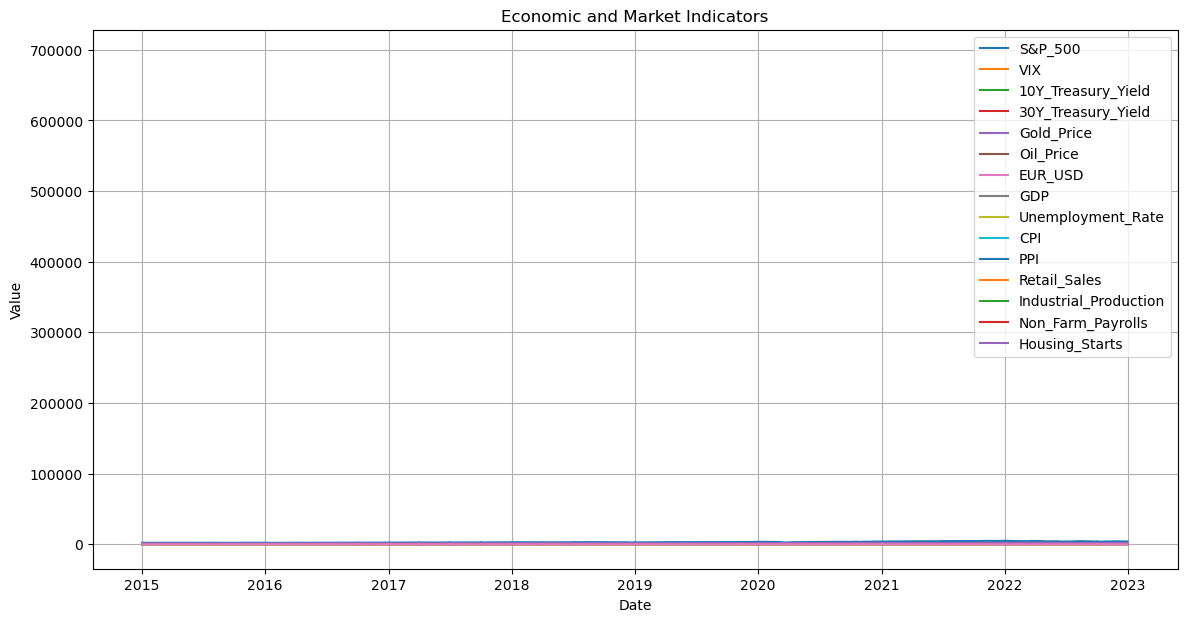

In [9]:
# Load the saved data
market_data = pd.read_csv('market_data.csv', index_col='Date', parse_dates=True)
economic_data = pd.read_csv('economic_data.csv', index_col='date', parse_dates=True)

# Merge the market and economic data
combined_data = pd.merge(market_data, economic_data, left_index=True, right_index=True, how='outer')

# Display the combined data
print(combined_data.head())

# Save the combined data to a CSV file
combined_data.to_csv('combined_data.csv')

# Plot the combined data
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for column in combined_data.columns:
    plt.plot(combined_data.index, combined_data[column], label=column)
plt.title('Economic and Market Indicators')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
